### TSI indicator to BTC market Trading Worksheet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# import Bitcoin market price
prices = pd.read_csv("BTC_061419.csv", parse_dates=['Date'])
prices.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2013-04-28,135.3,135.98,132.1,134.21,0,"1,488,566,728"
1,2013-04-29,134.44,147.49,134,144.54,0,"1,603,768,865"
2,2013-04-30,144,146.93,134.05,139,0,"1,542,813,125"
3,2013-05-01,139,139.89,107.72,116.99,0,"1,298,954,594"
4,2013-05-02,116.38,125.6,92.28,105.21,0,"1,168,517,495"


In [3]:
# format the datatypes for useability
prices[['Open*', 'High', 'Low', 'Close**']]
prices['Open*'] = prices['Open*'].str.replace(",","").astype(float)
prices['High'] = prices['High'].str.replace(",","").astype(float)
prices['Low'] = prices['Low'].str.replace(",","").astype(float)
prices['Close**'] = prices['Close**'].str.replace(",","").astype(float)
prices['Volume'] = prices['Volume'].str.replace(",","").astype(object)
prices['Market Cap'] = prices['Market Cap'].str.replace(",","").astype(object)
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 7 columns):
Date          2239 non-null datetime64[ns]
Open*         2239 non-null float64
High          2239 non-null float64
Low           2239 non-null float64
Close**       2239 non-null float64
Volume        2239 non-null object
Market Cap    2239 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 122.5+ KB


In [4]:
# average for best guess daily representation of price
prices['price'] = prices[['Open*', 'High', 'Low', 'Close**']].mean(axis=1)
prices.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap,price
0,2013-04-28,135.30,135.98,132.10,134.21,0,1488566728,134.3975
1,2013-04-29,134.44,147.49,134.00,144.54,0,1603768865,140.1175
2,2013-04-30,144.00,146.93,134.05,139.00,0,1542813125,140.9950
3,2013-05-01,139.00,139.89,107.72,116.99,0,1298954594,125.9000
4,2013-05-02,116.38,125.60,92.28,105.21,0,1168517495,109.8675


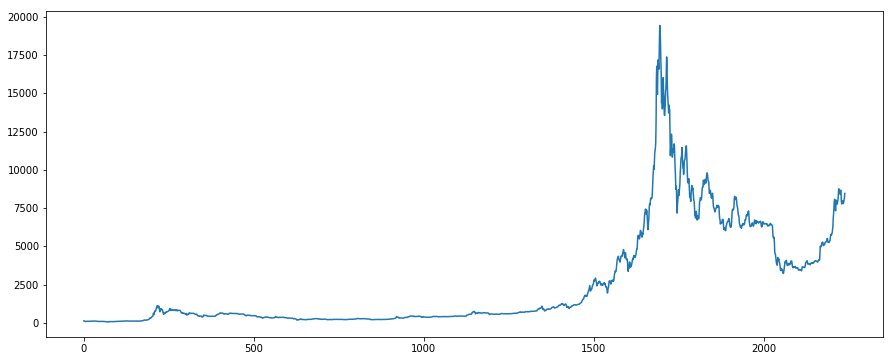

In [5]:
# visualize the price
prices['price'].plot(figsize=(15,6))
plt.show()

In [6]:
def compute_log_returns(prices):
    return np.log(prices) - np.log(prices.shift(1))

In [7]:
# compute daily returns
daily_returns = compute_log_returns(prices['price']).dropna()
daily_returns[:5]

1    0.041680
2    0.006243
3   -0.113236
4   -0.136213
5   -0.116274
Name: price, dtype: float64

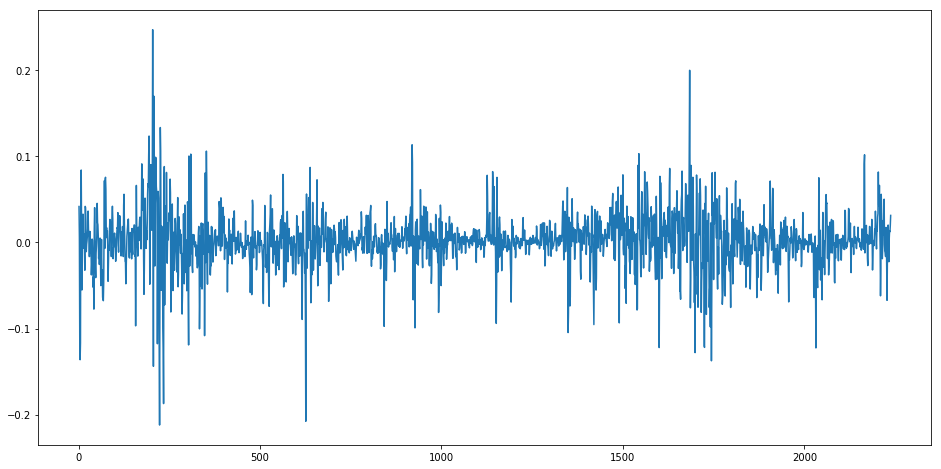

In [8]:
# visualize the returns over 6 years
daily_returns.plot(figsize=(16,8))

In [9]:
# put this into a dataframe
df_returns = daily_returns.to_frame()
df_returns = df_returns.rename(index=str, columns={"price": "btc_log_ret"})
dates = (prices['Date'].tolist())[1:]
df_returns['date'] = dates
df_returns.head()

,btc_log_ret,date
1,0.041680,2013-04-29
2,0.006243,2013-04-30
3,-0.113236,2013-05-01
4,-0.136213,2013-05-02
5,-0.116274,2013-05-03


In [10]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2238 entries, 1 to 2238
Data columns (total 2 columns):
btc_log_ret    2238 non-null float64
date           2238 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 52.5+ KB


### Inject TSI built by ETL

In [11]:
# import the Twitter Sentiment Indicator updated by ETL script
df_tsi = pd.read_csv('tsi_6_16_2019.csv')
df_tsi.head()

,date,vad_compound
0,2014-01-01,0.294400
1,2014-01-02,0.234772
2,2014-01-03,0.205479
3,2014-01-04,0.290856
4,2014-01-05,0.102421


In [12]:
df_tsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 2 columns):
date            1993 non-null object
vad_compound    1993 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.2+ KB


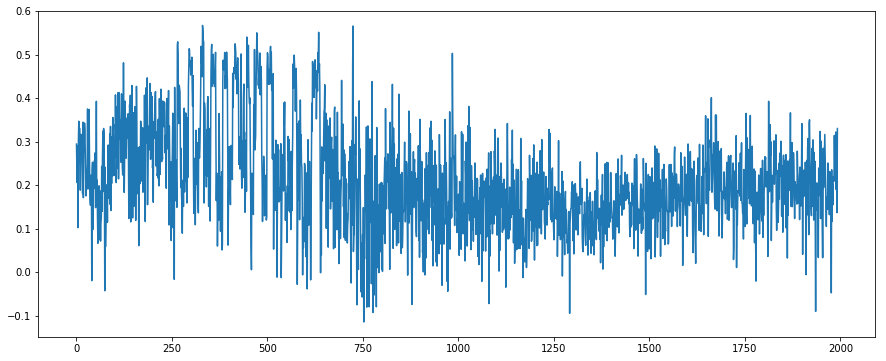

In [13]:
# visualize the TSI indicator
df_tsi['vad_compound'].plot(figsize=(15,6))
plt.show()

In [14]:
# format indicator dates to timestamps
df_tsi['date'] = pd.to_datetime(df_tsi.date, format="%Y-%m-%d")

In [15]:
# merge returns and indicator
df_trade = pd.merge(df_tsi,df_returns, on='date')
df_trade.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1990
Data columns (total 3 columns):
date            1991 non-null datetime64[ns]
vad_compound    1991 non-null float64
btc_log_ret     1991 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 62.2 KB


In [16]:
df_trade.head()

,date,vad_compound,btc_log_ret
0,2014-01-01,0.294400,0.014370
1,2014-01-02,0.234772,0.034299
2,2014-01-03,0.205479,0.025434
3,2014-01-04,0.290856,0.030090
4,2014-01-05,0.102421,0.073500


In [17]:
df_trade.tail()

,date,vad_compound,btc_log_ret
1986,2019-06-10,0.215495,0.003657
1987,2019-06-11,0.284463,0.013321
1988,2019-06-12,0.322285,0.012501
1989,2019-06-13,0.189631,0.019870
1990,2019-06-14,0.307329,0.031347


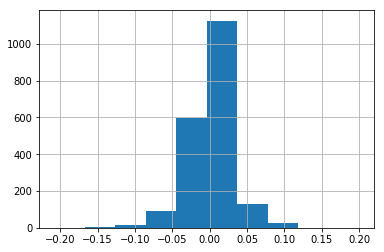

In [18]:
# plot returns
df_trade['btc_log_ret'].hist()

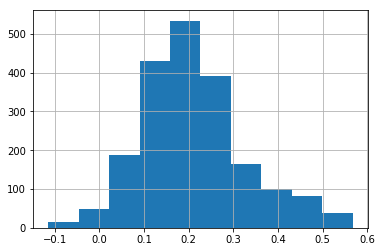

In [19]:
# plot sentiment
df_trade['vad_compound'].hist()

In [20]:
# shift returns function
def shift_returns(returns, shift_n):
    return returns.shift(shift_n)

In [21]:
# compute lookforward
shift_btc = shift_returns(df_trade['btc_log_ret'],-1)

In [22]:
# long style "contrarian" trading rules with TSI indicator
# contrarian = high sentiment is sell signal, low sentiment is buy
in_out = [0]
last = 0
for _,nrows in df_trade[1:].iterrows():
    # currently out and testing for entry
    if last == 0:
        # entry threshold guesstimate to buy
        if nrows['vad_compound'] < 0.1:
            last = 1
    # currently in and testing for exit
    else:
        # exit threshold guesstimate to sell
        if nrows['vad_compound'] > 0.3:
            last = 0
    # update position
    in_out.append(last)

df_trade['in_out'] = in_out
df_trade.head()

,date,vad_compound,btc_log_ret,in_out
0,2014-01-01,0.294400,0.014370,0
1,2014-01-02,0.234772,0.034299,0
2,2014-01-03,0.205479,0.025434,0
3,2014-01-04,0.290856,0.030090,0
4,2014-01-05,0.102421,0.073500,0


In [23]:
# check a short trade
df_trade[160:170]

,date,vad_compound,btc_log_ret,in_out
160,2014-06-10,0.257279,0.000947,0
161,2014-06-11,0.286369,-0.012945,0
162,2014-06-12,0.275780,-0.057545,0
163,2014-06-13,0.060726,-0.018704,1
164,2014-06-14,0.152250,-0.024387,1
165,2014-06-15,0.288185,-0.005381,1
166,2014-06-16,0.203204,0.027221,1
167,2014-06-17,0.228964,0.009661,1
168,2014-06-18,0.347085,0.014156,0
169,2014-06-19,0.332173,-0.009317,0


In [24]:
port_returns = shift_btc*(df_trade['in_out'])
port_returns.describe()

count    1990.000000
mean        0.001067
std         0.023530
min        -0.207677
25%        -0.000288
50%         0.000000
75%         0.004613
max         0.199846
dtype: float64

In [25]:
# compute daily standard deviation
std = np.std(port_returns)
std

0.023524002947269505

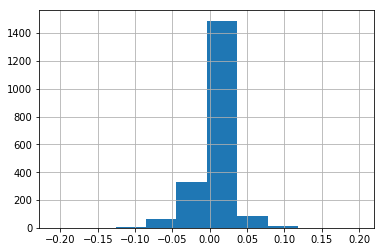

In [26]:
# plot histogram of trade returns
port_returns.hist()

In [27]:
# t test definition
def analyze_alpha(expected_portfolio_returns_by_date, sigma):
    t_test = stats.ttest_1samp(expected_portfolio_returns_by_date,sigma)
    t_value = t_test[0]
    p_value = t_test[1]/2
    return t_value, p_value

In [28]:
# do a t-test of trades
analyze_alpha(port_returns.dropna(), std)

(-42.57559659681954, 2.0823971147658764e-282)

In [29]:
# expected returns over 5 years time in percent
(np.exp(port_returns[1:].T.sum())-1)*100

735.6535654110679

In [30]:
# anualized volatility
vol_year = np.std(port_returns)*np.sqrt(252)
vol_year

0.37343196983535354

In [31]:
# sharp ratio on this trade strategy
ret_year = (np.exp(port_returns[1:].T.sum())-1)/5
risk_free = 0.035
sharp = (ret_year - risk_free) / vol_year
sharp

3.8462350490650414

####  Disclaimer: This project is for educational purposes and not intended for real life trading.